# **MovieLens 1M Dataset**

*Chú thích: Nên chạy notebook theo thứ tự để tránh phát sinh lỗi không mong muốn*

Tổng quan: GroupLens Research cung cấp một số bộ sưu tập dữ liệu xếp hạng phim được thu thập từ người dùng của MovieLens vào cuối thập niên 1990 và 2000. Dữ liệu cung cấp các dữ liệu phim, thể loại - năm, điểm đánh giá và dữ liệu người xem (tuổi, mã zip, giới tính và nghề nghiệp). Các bộ dữ liệu này thường được cung cấp cho học máy và hệ thống khuyến nghị.

Người dùng có thể truy cập dữ liệu này thông qua đường liên kết đến github: https://github.com/wesm/pydata-book

**Clone dataset từ github: https://github.com/wesm/pydata-book**

In [1]:
!git clone https://github.com/wesm/pydata-book.git

Cloning into 'pydata-book'...
remote: Enumerating objects: 558, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 558 (delta 24), reused 7 (delta 4), pack-reused 525 (from 1)
Receiving objects: 100% (558/558), 63.76 MiB | 14.09 MiB/s, done.
Resolving deltas: 100% (210/210), done.


----

## 1. TRUY CẬP DỮ LIỆU

**Import thư viện**

In [3]:
import json
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

Đối với bộ dữ liệu bao gồm nhiều bảng (ratings, user information và movie information):

- Thực hiện load các bảng vào từng panda frame riêng biệt

In [8]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table('/content/pydata-book/datasets/movielens/users.dat', sep="::",header=None, names=unames, engine="python")

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table('/content/pydata-book/datasets/movielens/ratings.dat', sep="::",header=None, names=rnames, engine="python")

mnames = ["movie_id", "title", "genres"]
movies = pd.read_table('/content/pydata-book/datasets/movielens/movies.dat', sep="::",header=None, names=mnames, engine="python")

In [10]:
users.head(5)

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [11]:
ratings.head(5)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [12]:
movies.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


## 2. KHAI PHÁ VÀ XỬ LÝ DỮ LIỆU

### A. Nhiệm vụ phân tích dữ liệu liên quan đến 3 bảng

- **Tính mean ratings đối với 1 movie bởi giới tính và độ tuổi**

*Note: Đối với nhiệm vụ phân tích dữ liệu đa bảng, các bước thực hiện cần theo tuần tự và đạt được kết quả thể hiện đúng với ý nghĩa nhiệm vụ*

**Merge ratings với users, sau đó merge kết quả với movies**

In [14]:
data = pd.merge(pd.merge(ratings, users), movies)

data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [15]:
data.iloc[0]

,0
user_id,1
movie_id,1193
rating,5
timestamp,978300760
gender,F
age,1
occupation,10
zip,48067
title,One Flew Over the Cuckoo's Nest (1975)
genres,Drama


**Tính mean movie ratings cho từng film nhóm bởi giới tính, sử dụng pivot_table method**

In [16]:
mean_ratings = data.pivot_table("rating", index="title",columns="gender", aggfunc="mean")

mean_ratings.head(5)

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


**Lọc movies với ít nhất 250 ratings**

In [18]:
# Group data by title and use size() to get a Series of group sizes for each title
ratings_by_title = data.groupby("title").size()

ratings_by_title.head()

,0
title,
"$1,000,000 Duck (1971)",37
'Night Mother (1986),70
'Til There Was You (1997),52
"'burbs, The (1989)",303
...And Justice for All (1979),199


In [19]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [20]:
# Select rows from mean_ratings using .loc
mean_ratings = mean_ratings.loc[active_titles]

mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


**Lấy top films among female viewers**

In [21]:
top_female_ratings = mean_ratings.sort_values("F", ascending=False)

top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


<Axes: ylabel='title'>

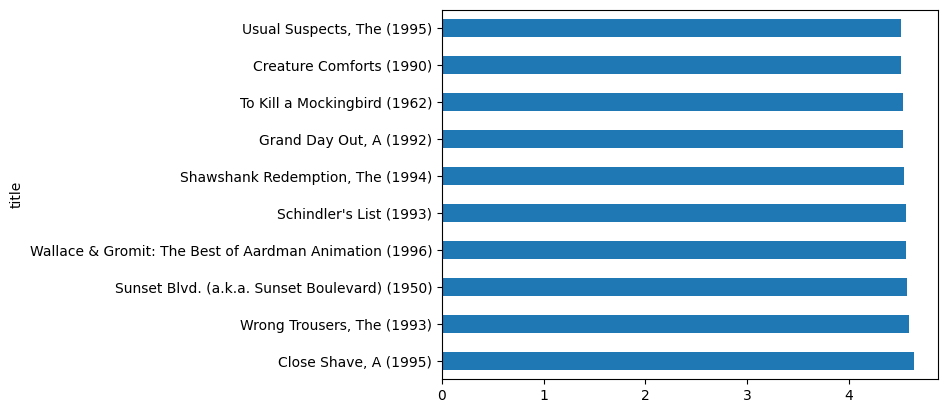

In [25]:
# Visualize
top_female_ratings["F"][:10].plot.barh()

**Tính độ khác biệt giữa phim ratings bởi Male và Female**

In [22]:
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]

sorted_by_diff = mean_ratings.sort_values("diff")

sorted_by_diff.head()

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


- Đảo thứ tự các dòng và lấy ra 10 dòng cao nhất, từ đó ta có top 10 movies đánh giá bởi M mà F không đánh giá cao

In [28]:
sorted_by_diff[::-1].head()

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787


**Các movies không được ủng hộ bởi khán giả**

- Thực hiện tính toán variance of standard deviation (phương sai hoặc độ lệch chuẩn) của các ratings

In [29]:
rating_std_by_title = data.groupby("title")["rating"].std()

rating_std_by_title = rating_std_by_title.loc[active_titles]

rating_std_by_title.head()

,rating
title,
"'burbs, The (1989)",1.107760
10 Things I Hate About You (1999),0.989815
101 Dalmatians (1961),0.982103
101 Dalmatians (1996),1.098717
12 Angry Men (1957),0.812731


- Sắp xếp theo descending order và lấy 10 dòng

In [30]:
rating_std_by_title.sort_values(ascending=False)[:10]

,rating
title,
Dumb & Dumber (1994),1.321333
"Blair Witch Project, The (1999)",1.316368
Natural Born Killers (1994),1.307198
Tank Girl (1995),1.277695
"Rocky Horror Picture Show, The (1975)",1.260177
Eyes Wide Shut (1999),1.259624
Evita (1996),1.253631
Billy Madison (1995),1.249970
Fear and Loathing in Las Vegas (1998),1.246408


Đối với các thể loại (genres) của phim, một phim có thể có nhiều thể loại và được ngăn cách bởi (|). Vì thế, để có thể phân loại phim theo từng thể loại, ta có thể tách các thể loại bằng **str.split**:

In [31]:
movies["genres"].head()

,genres
0,Animation|Children's|Comedy
1,Adventure|Children's|Fantasy
2,Comedy|Romance
3,Comedy|Drama
4,Comedy


In [32]:
movies["genres"].head().str.split("|")

,genres
0,"[Animation, Children's, Comedy]"
1,"[Adventure, Children's, Fantasy]"
2,"[Comedy, Romance]"
3,"[Comedy, Drama]"
4,[Comedy]


In [ ]:
movies["genre"] = movies.pop("genres").str.split("|")

In [36]:
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


**Tạo dataframe mới với từng genres bằng .explode**

In [37]:
movies_exploded = movies.explode("genre")

movies_exploded[:10]

,movie_id,title,genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


**Phân loại movies theo genres**

In [38]:
# Merge movies_explode, ratings, users
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)

ratings_with_genre.iloc[0]

,0
movie_id,1
title,Toy Story (1995)
genre,Animation
user_id,1
rating,5
timestamp,978824268
gender,F
age,1
occupation,10
zip,48067


In [39]:
genre_ratings = (ratings_with_genre.groupby(["genre", "age"])["rating"].mean().unstack("age"))

genre_ratings[:10]

age,1,18,25,35,45,50,56
genre,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700
